<a href="https://colab.research.google.com/github/yurikr/Food101/blob/master/food101fastaiEffNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
from fastai.vision import *

In [12]:
path = untar_data(URLs.FOOD)

A new version of the dataset is available.


In [13]:
path.ls()

[PosixPath('/root/.fastai/data/food-101/h5'),
 PosixPath('/root/.fastai/data/food-101/test.json'),
 PosixPath('/root/.fastai/data/food-101/test.txt'),
 PosixPath('/root/.fastai/data/food-101/train.txt'),
 PosixPath('/root/.fastai/data/food-101/labels.txt'),
 PosixPath('/root/.fastai/data/food-101/images'),
 PosixPath('/root/.fastai/data/food-101/classes.txt'),
 PosixPath('/root/.fastai/data/food-101/train.json')]

In [14]:
path_img = path.joinpath('images')

In [15]:
path_img.ls()


[PosixPath('/root/.fastai/data/food-101/images/caprese_salad'),
 PosixPath('/root/.fastai/data/food-101/images/hot_dog'),
 PosixPath('/root/.fastai/data/food-101/images/sushi'),
 PosixPath('/root/.fastai/data/food-101/images/ice_cream'),
 PosixPath('/root/.fastai/data/food-101/images/french_toast'),
 PosixPath('/root/.fastai/data/food-101/images/donuts'),
 PosixPath('/root/.fastai/data/food-101/images/seaweed_salad'),
 PosixPath('/root/.fastai/data/food-101/images/macaroni_and_cheese'),
 PosixPath('/root/.fastai/data/food-101/images/club_sandwich'),
 PosixPath('/root/.fastai/data/food-101/images/nachos'),
 PosixPath('/root/.fastai/data/food-101/images/panna_cotta'),
 PosixPath('/root/.fastai/data/food-101/images/caesar_salad'),
 PosixPath('/root/.fastai/data/food-101/images/grilled_salmon'),
 PosixPath('/root/.fastai/data/food-101/images/scallops'),
 PosixPath('/root/.fastai/data/food-101/images/bibimbap'),
 PosixPath('/root/.fastai/data/food-101/images/ramen'),
 PosixPath('/root/.fast

In [16]:
 folders = [x for x in path_img.iterdir() if x.is_dir()] 
 labels = [x.stem for x in folders]
 labels[:2]

['caprese_salad', 'hot_dog']

In [17]:
sorted(labels)

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [18]:
with open(path.joinpath('labels.txt')) as f:
    metadata_labels = f.read().splitlines()

with open(path.joinpath('classes.txt')) as f:
    classes = f.read().splitlines()

with open(path.joinpath('train.txt')) as f:
    train_text_fnames = f.read().splitlines()

with open(path.joinpath('test.txt')) as f:
    test_text_fnames = f.read().splitlines()

fn_paths = [list(x.glob('*.jpg')) for x in folders]

metadata_labels = sorted([l.lower().replace(" ", "_") for l in metadata_labels])



In [19]:
# Check that labels match metadata
A = sorted(labels)
C = sorted(classes)
B = metadata_labels

set(B)-set(A), set(C) - set(A), len(B)

(set(), set(), 101)

In [20]:
train_text_fnames[0], test_text_fnames[0], metadata_labels[0]

('apple_pie/1005649', 'apple_pie/1011328', 'apple_pie')

In [21]:
from collections import namedtuple

def get_df_from_files(files_path, is_valid):

  Record = namedtuple('Record', ['full_path', 'category', 'is_valid'])

  records = [Record(str(path_img.joinpath(f + ".jpg")), f.split('/')[0], is_valid) for f in files_path]

  return pd.DataFrame(records, columns=Record._fields)

train_df = get_df_from_files(train_text_fnames, False)
test_df = get_df_from_files(test_text_fnames, True)

# Concatenate train and test sets
image_df = pd.concat([train_df, test_df])

In [22]:
len(test_df), len(train_df), train_df.columns, train_df.head()

(25250,
 75750,
 Index(['full_path', 'category', 'is_valid'], dtype='object'),
                                            full_path   category  is_valid
 0  /root/.fastai/data/food-101/images/apple_pie/1...  apple_pie     False
 1  /root/.fastai/data/food-101/images/apple_pie/1...  apple_pie     False
 2  /root/.fastai/data/food-101/images/apple_pie/1...  apple_pie     False
 3  /root/.fastai/data/food-101/images/apple_pie/1...  apple_pie     False
 4  /root/.fastai/data/food-101/images/apple_pie/1...  apple_pie     False)

In [23]:
# Loading image to a ImageList from path in DataFrame
split_and_labeled_images = (ImageList.from_df(
    image_df, 
    '..',
    cols='full_path',    
))
np.random.seed(101)
# Split image into train and validation set based on the is_valid column
split_and_labeled_images = split_and_labeled_images.split_from_df(col='is_valid')

# Label images based on category column
split_and_labeled_images = split_and_labeled_images.label_from_df(cols='category')

print(split_and_labeled_images)

LabelLists;

Train: LabelList (75750 items)
x: ImageList
Image (3, 512, 308),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: ..;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 384),Image (3, 512, 384),Image (3, 512, 382),Image (3, 342, 512)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: ..;

Test: None


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
drive_weight_path_root = 'drive/My Drive/MachineLearning/fastai/'

In [26]:
# Visualize transforms separately on a random image
def display_transform(img_df, img_dir_path, transform, min_value, max_value, 
                      columns=6, width=24, height=16):
    # Sample an image from the whole dataset
    sample_file_name = img_df.sample(1)['full_path'].iloc[0]
    img = open_image(img_dir_path/sample_file_name)
    img.show(title=sample_file_name + ' - ' + str(transform))
    
    fig, axes = plt.subplots(1, columns, figsize=(width,height))
    
    # Visualize different levels of variation
    for value, axis in zip(np.linspace(min_value, max_value, columns), axes):
        # open a new image, cause old image has been transformed
        img = open_image(img_dir_path/sample_file_name)
        transform(img, value).show(ax=axis, title=f'value={value:.4f}')

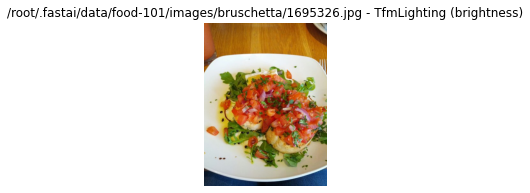

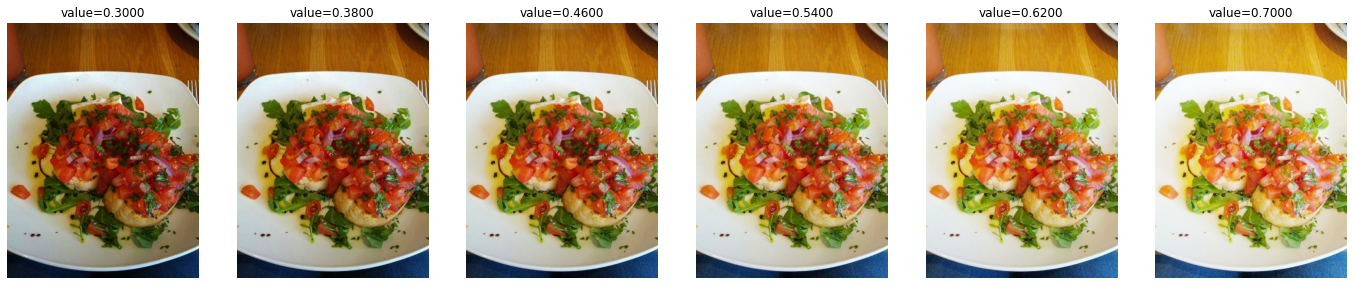

In [27]:
display_transform(image_df, path_img, brightness, 
                  min_value = 0.5 - 0.2, max_value = 0.5 + 0.2)

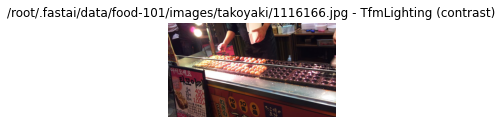

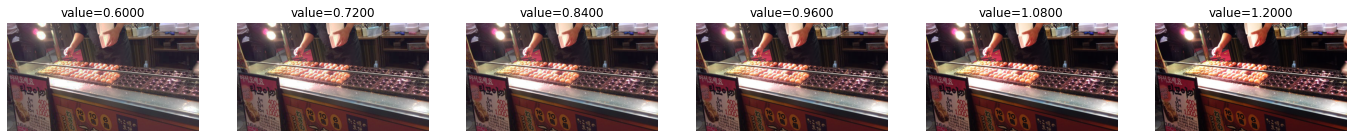

In [28]:
display_transform(image_df, path_img, contrast, 
                  min_value = 1-0.4, max_value = 1+0.2)

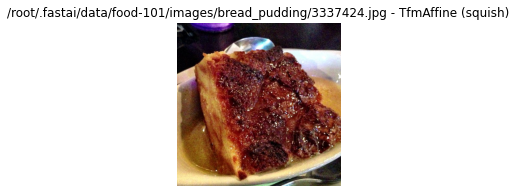

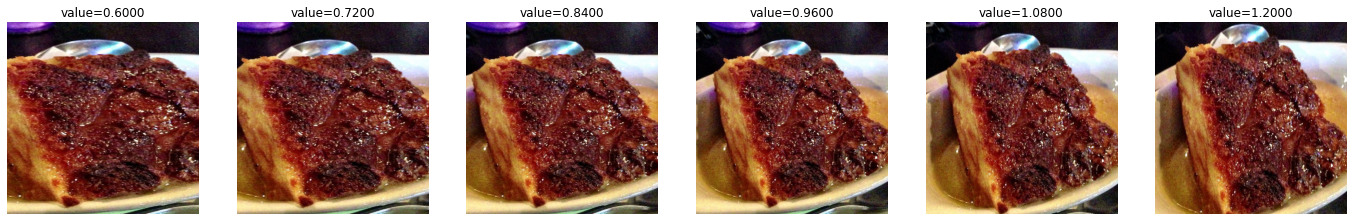

In [29]:
display_transform(image_df, path_img, squish, 
                  min_value = 1-0.4, max_value = 1+0.2)

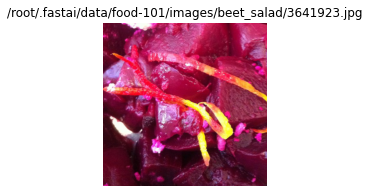

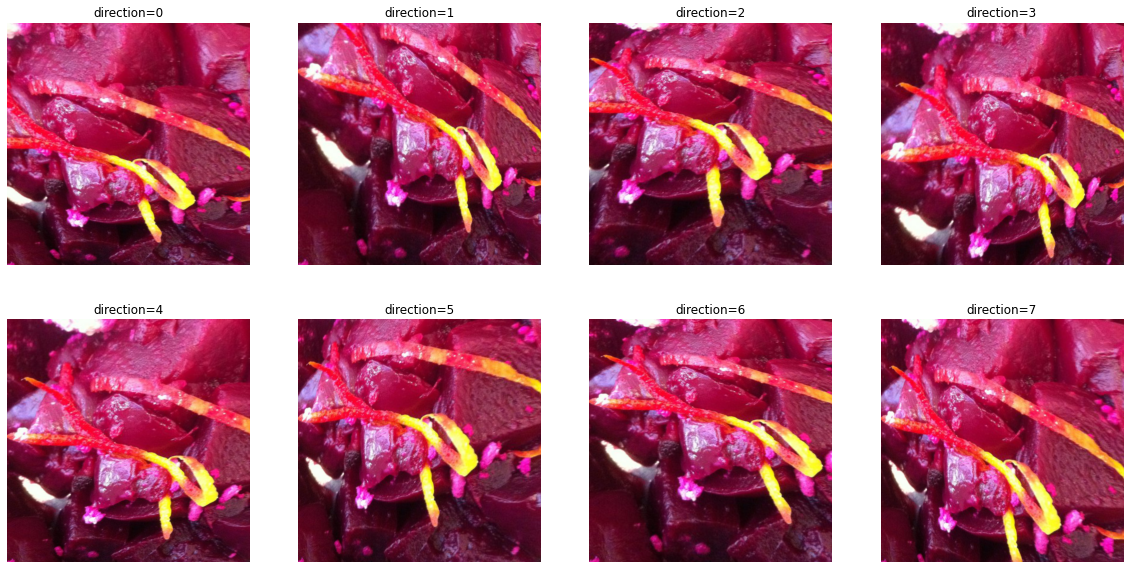

In [30]:
# Displaying skew requires a different logic than the other transforms
def display_skew_transform(img_df, img_dir_path, rows=2, columns=4, width=20, height=10):
    sample_file_name = img_df.sample(1)['full_path'].iloc[0]
    img = open_image(img_dir_path/sample_file_name)
    img.show(title=sample_file_name)

    fig, axs = plt.subplots(rows, columns, figsize=(width,height))
    for i, ax in enumerate(axs.flatten()):
        # open a new image, cause old image has been transformed
        open_image(img_dir_path/sample_file_name).skew(i, 0.7).show(ax=ax, title=f'direction={i}')

display_skew_transform(image_df,path_img)

In [31]:
def seed_everything(seed=1234):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
seed_everything()

In [32]:
image_batch_size = 16
transform_image_size = (224, 224)

# Define transforms used for data augmentation
# By default, only horizontal flip is used, not vertical flip
# Disable default lighting alteration, and use brightness and constrast for finer control
"""
image_transforms = get_transforms(
    max_rotate=10,
    max_zoom=1.1,
  
    max_lighting=None,
    max_warp=0.2,
    xtra_tfms=[
        brightness(change=(0.5-0.2, 0.5+0.2), p=0.5),
        contrast(scale=(1-0.4, 1+0.2), p=0.5),
        squish(scale=(1-0.3, 1+0.5), p=0.5),
        skew(direction=(0, 7), magnitude=random.randint(0,6)/10, p=0.5),
    ]
)

"""

image_transforms = ([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-40, 40)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.4), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.35, 0.65)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.7, 1.43)}, p=0.75, resolved={}, do_run=True, is_random=True),
            RandTransform(tfm=TfmCoord (jitter), kwargs={'magnitude': (-0.01, 0.01)}, p=0.3, resolved={}, do_run=True, is_random=True),
            RandTransform(tfm=TfmCoord (skew), kwargs={'direction': (0, 7), 'magnitude': (0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
            RandTransform(tfm=TfmAffine (squish), kwargs={'scale': (0.42, 2.4), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True)], 
           [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True)])


image_data_bunch = (
    split_and_labeled_images.transform(
        image_transforms, 
        size=transform_image_size, 
        resize_method=ResizeMethod.SQUISH)
    .databunch(bs=image_batch_size)
    .normalize(imagenet_stats)
)





/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

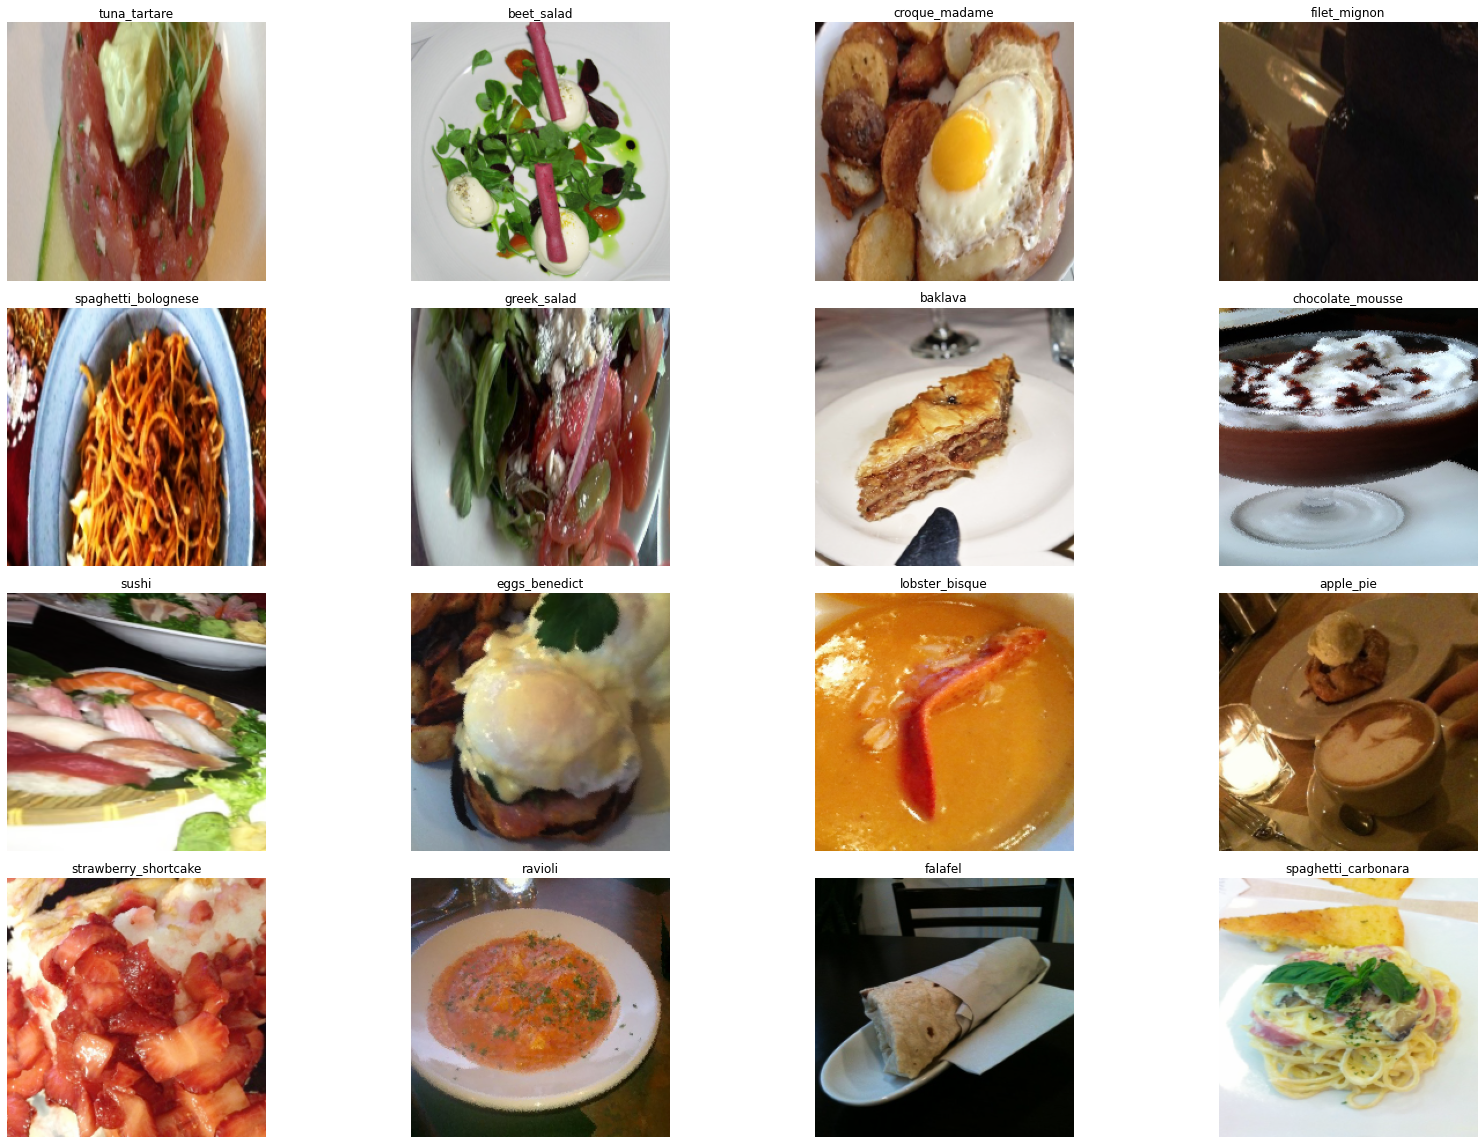

In [33]:
# Visualize some images, with transforms applied randonmly
image_data_bunch.show_batch(rows=4, figsize=(24,16))

In [34]:
!pip install efficientnet-pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16031 sha256=dfbe64010c4b1a224334ea5b9452577ee7f9994885f30c4013f1bcda06775d98
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch


In [35]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained("efficientnet-b5")

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b5-b6417697.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b5-b6417697.pth



Loaded pretrained weights for efficientnet-b5


In [36]:
top_5 = partial(top_k_accuracy, k=5)
 
learn = Learner(image_data_bunch, model, metrics=[accuracy, top_5], callback_fns=ShowGraph).to_fp16()
learn.split( lambda m: (model._conv_head,) )

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: ..;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: ..;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.37E-03
Min loss divided by 10: 8.32E-03


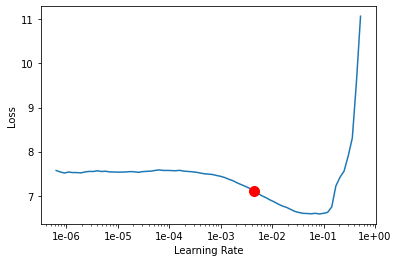

In [37]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [39]:
print(image_data_bunch.classes)
print(len(image_data_bunch.classes))
print(image_data_bunch.c)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [ ]:
last_block_lr = 4.3e-3

learn.fit_one_cycle(1, max_lr = slice(last_block_lr))

learn.save('stage1-b5-size224', return_path=True)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi